Business Problem: The hotel management team seeks to enhance customer satisfaction and brand image by understanding the key factors influencing positive and negative reviews. They aim to identify the attributes that travelers prioritize when selecting a hotel, thereby enabling the management to focus on areas that contribute most to positive guest experiences

Objective: Utilize sentiment analysis and attribute identification techniques on the dataset of 20,491 reviews and ratings to uncover the primary factors driving positive and negative guest experiences. By identifying these factors, the objective is to provide actionable insights to the hotel management team, enabling them to prioritize improvements that will enhance customer satisfaction, drive positive reviews, and bolster the hotel's brand image.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import accuracy_score
import plotly.graph_objects as go
from sklearn import metrics
from sklearn.metrics import classification_report
%matplotlib inline

In [ ]:
df = pd.read_excel('/content/hotel_reviews.xlsx')

In [ ]:
df

,Review,Rating,@
0,nice hotel expensive parking got good deal sta...,4,NaN
1,ok nothing special charge diamond member hilto...,2,NaN
2,nice rooms not 4* experience hotel monaco seat...,3,NaN
3,"unique, great stay, wonderful time hotel monac...",5,NaN
4,"great stay great stay, went seahawk game aweso...",5,NaN
...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,NaN
20487,great location price view hotel great quick pl...,4,NaN
20488,"ok just looks nice modern outside, desk staff ...",2,NaN
20489,hotel theft ruined vacation hotel opened sept ...,1,NaN



Here you have to remove the "@" column since it is a redundant column and does not contribute to the analysis of hotel reviews.

#Data exploration

In [ ]:
df_new=df.drop('@',axis=1)
df_new

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


In [ ]:
df_new.isnull().sum()

Review    0
Rating    0
dtype: int64

In [ ]:
df_new.shape

(20491, 2)

In [ ]:
df_new.duplicated().sum()

0

In [ ]:
df_new.describe()

,Rating
count,20491.000000
mean,3.952223
std,1.233030
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


* These quartiles provide insights into the distribution of ratings, indicating that a significant portion of ratings (25th to 75th percentile) are relatively high (3 to 5).
* Overall, the statistical summary of the "Rating" column suggests that while there is variability in user ratings, the majority of ratings tend to be positive, with a mean rating close to 4 out of 5. However, there are also instances of low ratings, indicating areas where hotels may need improvement to enhance user satisfaction.

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


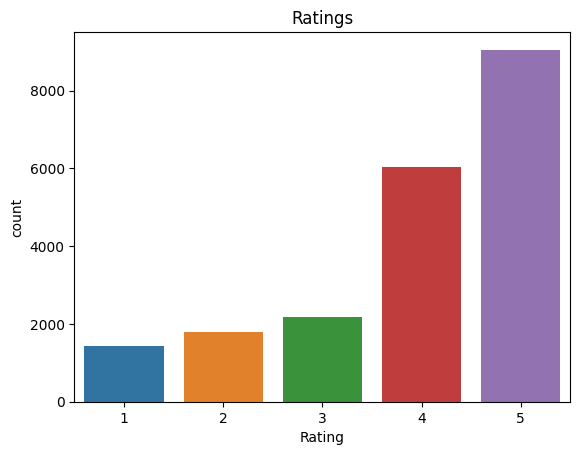

In [ ]:
sns.countplot(x='Rating', data=df_new)
plt.title('Ratings')
plt.show()

Most of the ratings are 5 & 4 so we can come to a conclusion that most of the customers were overall happy with hotel.

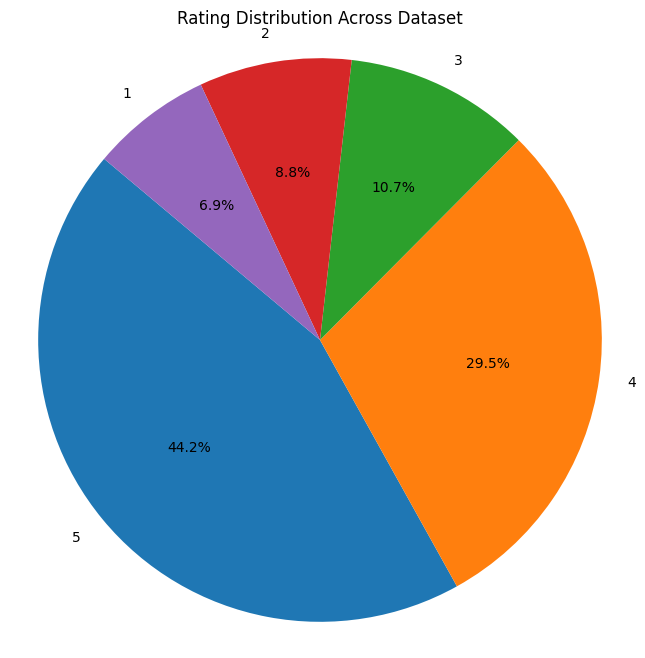

In [ ]:
plt.figure(figsize=(8, 8))
ratings_count = df_new['Rating'].value_counts()
plt.pie(ratings_count, labels=ratings_count.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)
plt.title('Rating Distribution Across Dataset')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
df_new['Word_Count'] = df['Review'].apply(len)
df_new.head()

,Review,Rating,Word_Count
0,nice hotel expensive parking got good deal sta...,4,593
1,ok nothing special charge diamond member hilto...,2,1689
2,nice rooms not 4* experience hotel monaco seat...,3,1427
3,"unique, great stay, wonderful time hotel monac...",5,600
4,"great stay great stay, went seahawk game aweso...",5,1281


* This column represents the number of words in each review. It provides quantitative information about the length or complexity of the reviews.
* The word count can offer insights into the level of detail provided by users in their reviews. For instance, longer reviews may contain more comprehensive feedback.

In [ ]:
df_new['Word_Count'].describe()

count    20491.000000
mean       725.245571
std        689.933070
min         44.000000
25%        339.000000
50%        537.000000
75%        859.000000
max      13501.000000
Name: Word_Count, dtype: float64

* The mean word count provides an understanding of the average length of reviews. Longer reviews suggest detailed feedback or more elaborate descriptions of experiences.

* A high standard deviation implies a wide range of review lengths, indicating that some reviews are significantly longer or shorter than the average.

* The percentiles help understand the distribution of word counts and identify any skewness or outliers in the data.

In [ ]:
# Plot scatter plot
fig = px.scatter(df_new, x='Rating', y='Word_Count', title='Scatter Plot of Rating vs Word Count', labels={'Word_Count': 'Word Count'})
fig.show()

* The scatter plots suggests that there is a trend where reviews with higher ratings (4 and 5 stars) tend to have more words, indicating more detailed feedback and their positive experience. They elaborate on what they liked about the hotel, services, amenities, etc.
* Conversely, reviews with lower ratings (1 to 3 stars) tend to have fewer words, suggesting less detailed feedback, potentially highlighting specific issues or areas of dissatisfaction without elaborating extensively.

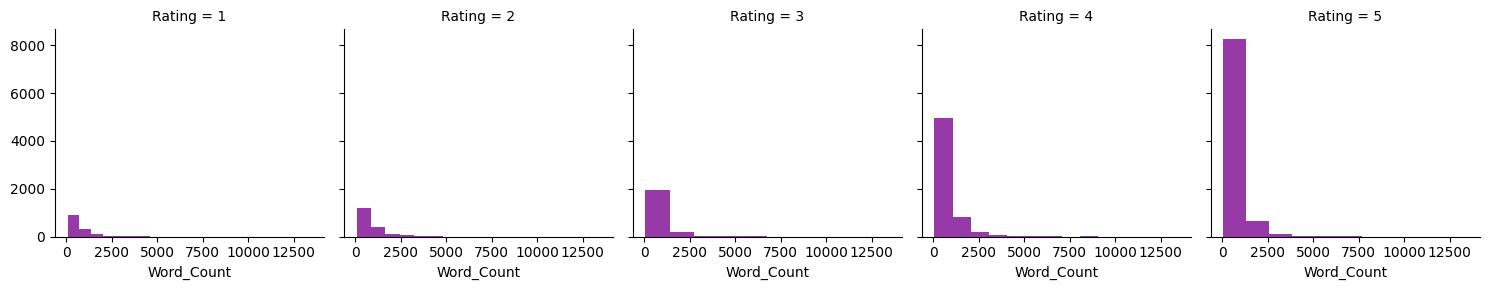

In [ ]:
g = sns.FacetGrid(data=df_new, col='Rating')
g.map(plt.hist, 'Word_Count', color='#973aa8')

In [ ]:
import re

In [ ]:
# Function to extract words related to .com from a review
def extract_com_related_words(review):
    # Using a regular expression to find words containing ".com"
    com_related_words = re.findall(r'\b\w+\.com\b', review)
    return com_related_words

# Iterate through all reviews and extract .com-related words
all_com_related_words = []
for index, row in df_new.iterrows():
    review_text = row['Review']
    com_words_in_review = extract_com_related_words(review_text)
    all_com_related_words.extend(com_words_in_review)

# Display the extracted .com-related words
print(all_com_related_words)

['hotwire.com', 'priceline.com', 'sneakysunday.com', 'hilton.com', 'hiexpress.com', 'yahoo.com', 'bookit.com', 'minute.com', 'hotel.com', 'hotel.com', 'fairmont.com', 'bookit.com', 'flickr.com', 'hotels.com', 'venere.com', 'hotels.com', 'tripadvisor.com', 'tripadvisor.com', 'otel.com', 'hotwire.com', 'tripadvisor.com', 'tripadvisor.com', 'tripadvisor.com', 'hotels.com', 'hotels.com', 'advisor.com', 'hotels.com', 'hotels.com', 'aol.com', 'travelocity.com', 'hotels.com', 'veryveggie.com', 'priceline.com', 'cheapcaribbean.com', 'clusters.com', 'hotmail.com', 'selloffvacations.com', 'hotmail.com', 'rr.com', 'hotmail.com', 'solmelia.com', 'tripadvisor.com', 'solmelia.com', 'vacationkids.com', 'gmail.com', 'aol.com', 'aol.com', 'aol.com', 'priceline.com', 'aol.com', 'hotels.com', 'gmail.com', 'intecontinental.com', 'acampapr.com', 'baravorunners.com', 'cheepoair.com', 'mac.com', 'hotelmilanopr.com', 'tripadvisor.com', 'booking.com', 'expedia.com', 'hotels.com', '1800hotels.com', 'hrs.com', '

In [ ]:
df_book = pd.Series(all_com_related_words).value_counts()
df_book

hotels.com          49
tripadvisor.com     37
hotmail.com         19
lastminute.com      16
yahoo.com           10
                    ..
ilikai.com           1
nyc.com              1
batobus.com          1
book.com             1
dlkinsurance.com     1
Length: 108, dtype: int64

In [ ]:
fig = px.bar(df_book, x=df_book.index, y=df_book.values, labels={'x': 'Words', 'y': 'Count'}, title='Sites Used For Booking')
fig.show()

* The frequent mentions of these top hotel booking websites indicate their significance and influence in the industry, highlighting their role in shaping consumer choices and preferences for hotel accommodations.
* The frequency of mentions may also indicate a level of trust and reliability associated with these websites. Users may feel confident booking hotels through platforms that are familiar and reputed in the industry.
* Websites like Hotels.com and TripAdvisor.com have a strong presence and are well-known in the hotel booking industry. Their high frequency of mentions reflects their brand recognition and influence in the market.

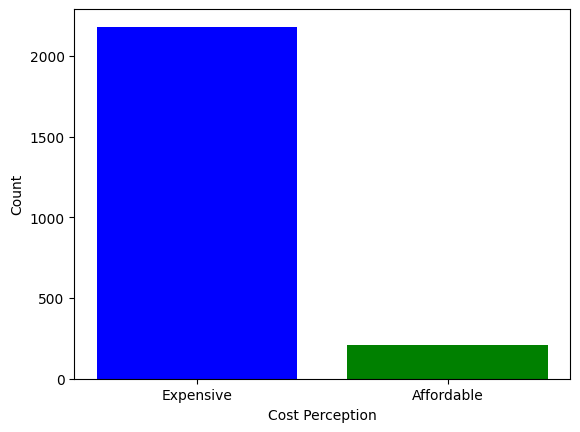

Total mentions of 'expensive':2182
Total mentions of 'affordable':206


In [ ]:
expensive_count = []
affordable_count = []
# Count occurrences of 'expensive' and 'affordable' in each review
for review in df['Review']:
  expensive_count.append(review.count('expensive'))
  affordable_count.append(review.count('affordable'))
# Calculate total counts
total_expensive = sum(expensive_count)
total_affordable = sum(affordable_count)
# Plotting the results
labels = ['Expensive','Affordable']
counts = [total_expensive, total_affordable]


plt.bar(labels, counts, color=['blue','green'])
plt.xlabel('Cost Perception')
plt.ylabel('Count')
plt.show()


print(f"Total mentions of 'expensive':{total_expensive}")
print(f"Total mentions of 'affordable':{total_affordable}")

* From this graph we can understand that the hotel is quite expensive as most of the customers cited the hotel as expensive.
* The high frequency of mentions for "expensive" suggests that this term is commonly used by individuals discussing hotel accommodations. It implies a widespread perception or concern regarding the high cost of certain hotels or destinations.
* Conversely, the lower frequency of mentions for "affordable" indicates that while affordability may be a consideration, it is not as frequently discussed or emphasized in the context of hotel bookings.


The data on mentions of "expensive" and "affordable" provides insights into consumer perceptions and preferences regarding pricing in the hotel industry. Understanding these dynamics can inform pricing strategies, marketing messaging, and product offerings to better meet customer needs and expectations.

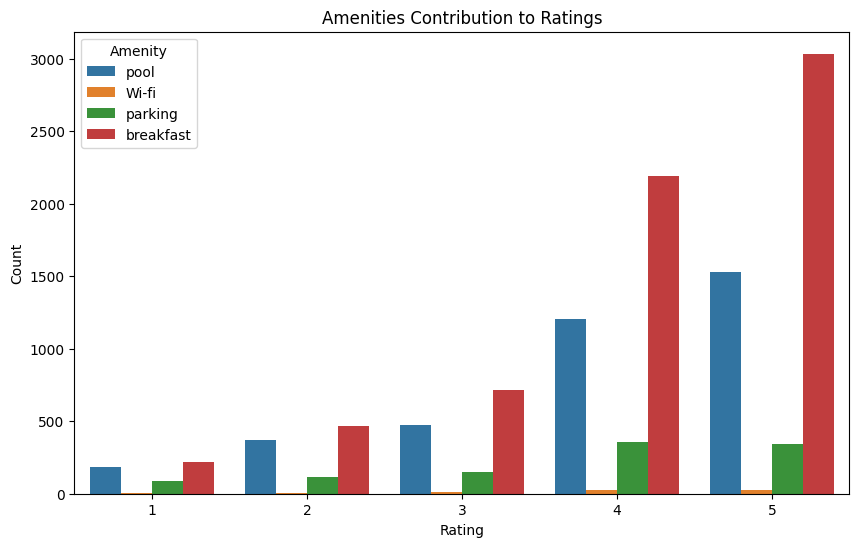

In [ ]:
amenities = ['pool','Wi-fi','parking','breakfast']
# Create columns for each amenity
for amenity in amenities:
  df_new[amenity] = 0
# Iterate through each row
for index, row in df_new.iterrows():
  words = row['Review'].split()
  for amenity in amenities:
        if amenity.lower() in words:
            df_new.at[index, amenity] += 1
# Group by rating and sum the counts for each amenity
amenities_counts = df_new.groupby('Rating')[amenities].sum().reset_index()

# Melt the DataFrame to make it suitable for plotting
amenities_counts_melted = pd.melt(amenities_counts, id_vars=['Rating'], var_name='Amenity', value_name='Count')

# Create a bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Rating', y='Count', hue='Amenity', data=amenities_counts_melted)
plt.title('Amenities Contribution to Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Amenity')
plt.show()

* The bar chart shows the average ratings given by customers for hotels with specific amenities, such as breakfast, pool facilities, wi-fi and parking.
* The observation suggests that hotels offering amenities like breakfast and pool facilities tend to receive higher ratings compared to hotels without these amenities.
* Customers perceive amenities such as breakfast and pool facilities as positive factors when choosing a hotel. These amenities enhance the overall experience and satisfaction levels during the stay.

The bar chart highlights a potential correlation between certain amenities (breakfast and pool facilities) and higher ratings in the hotel industry. Understanding and leveraging these positive factors can help hotels improve customer satisfaction, attract more guests, and enhance their competitive advantage in the market.

Now lets go for data cleaning.
Data cleaning is a critical step in the NLP pipeline. It ensures that the text data is well-prepared, consistent,free from noise, enabling NLP models to perform more accurately and reliably.







###Data cleaning

In [ ]:
import spacy

In [ ]:
nlp = spacy.load('en_core_web_sm')

In [ ]:
df_pr= df_new.copy()
df_pr

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


In [ ]:
# Function to remove stopwords using spaCy
def DOC(text):
    # Tokenize the text using spaCy
    doc = nlp(text)

    # Create a list of tokens without stopwords and lemmatize them
    tokens_without_stopwords = [token.lemma_ for token in doc if not token.is_stop]

    # Join the tokens back into a string
    filtered_text = ' '.join(tokens_without_stopwords)
    filtered_text = re.sub("[^A-Za-z]+"," ",filtered_text).lower()

    return filtered_text

# Iterate through the DataFrame and apply the DOC function to the 'Review' column
for index, row in df_pr.iterrows():
    text = row['Review']
    filtered_text = DOC(text)
    df_pr.at[index, 'pr_text'] = filtered_text

In [ ]:
 df_pr['pr_text']

0        nice hotel expensive parking get good deal sta...
1        ok special charge diamond member hilton decide...
2        nice room experience hotel monaco seattle good...
3        unique great stay wonderful time hotel monaco ...
4        great stay great stay go seahawk game awesome ...
                               ...                        
20486    well keep secret rd time stay charm star beat ...
20487    great location price view hotel great quick pl...
20488    ok look nice modern outside desk staff particu...
20489    hotel theft ruin vacation hotel open sept gues...
20490    people talk believe excellent rating hotel yes...
Name: pr_text, Length: 20491, dtype: object

In [ ]:
df_pr.head()

,Review,Rating,pr_text
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking get good deal sta...
1,ok nothing special charge diamond member hilto...,2,ok special charge diamond member hilton decide...
2,nice rooms not 4* experience hotel monaco seat...,3,nice room experience hotel monaco seattle good...
3,"unique, great stay, wonderful time hotel monac...",5,unique great stay wonderful time hotel monaco ...
4,"great stay great stay, went seahawk game aweso...",5,great stay great stay go seahawk game awesome ...


* Tokenized Review: Provides a structured representation of the text, where each token represents a distinct unit of meaning. It facilitates various text analysis tasks at the word level.
* Lemmatized Review: Standardizes words to their base form, aiding in reducing dimensionality and improving accuracy in text analysis. It ensures consistency in word representation and enhances interpretability by treating different word variations uniformly.

In [ ]:
data_pr = df_pr.copy()
data_pr.head()

,Review,Rating,pr_text
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking get good deal sta...
1,ok nothing special charge diamond member hilto...,2,ok special charge diamond member hilton decide...
2,nice rooms not 4* experience hotel monaco seat...,3,nice room experience hotel monaco seattle good...
3,"unique, great stay, wonderful time hotel monac...",5,unique great stay wonderful time hotel monaco ...
4,"great stay great stay, went seahawk game aweso...",5,great stay great stay go seahawk game awesome ...


In [ ]:
for i in range(len(data_pr['Rating'])):
  if data_pr['Rating'][i] > 3:
    data_pr.at[i,'Sentiment'] = 'Positive'
  elif data_pr['Rating'][i] < 3:
    data_pr.at[i, 'Sentiment'] = 'Negative'
  elif data_pr['Rating']  [i] ==3:
    data_pr.at[i, 'Sentiment'] = 'Neutral'

In [ ]:
data_pr.head()

,Review,Rating,pr_text,Sentiment
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking get good deal sta...,Positive
1,ok nothing special charge diamond member hilto...,2,ok special charge diamond member hilton decide...,Negative
2,nice rooms not 4* experience hotel monaco seat...,3,nice room experience hotel monaco seattle good...,Neutral
3,"unique, great stay, wonderful time hotel monac...",5,unique great stay wonderful time hotel monaco ...,Positive
4,"great stay great stay, went seahawk game aweso...",5,great stay great stay go seahawk game awesome ...,Positive


In [ ]:
data_pr.Sentiment.value_counts()

Positive    15093
Negative     3214
Neutral      2184
Name: Sentiment, dtype: int64

* Sentiment shows an imbalance among the classes, with a significantly larger number of samples in the "Positive" class compared to the "Negative" and "Neutral" classes.
* Imbalanced classes can lead to biased models that favor the majority class. Models trained on imbalanced data may have high accuracy for the majority class but perform poorly for minority classes. Balancing the classes can improve the overall performance of the model by ensuring it learns equally from all classes.

In [ ]:
df_word = data_pr[['Review','pr_text', 'Sentiment']]
df_word

,Review,pr_text,Sentiment
0,nice hotel expensive parking got good deal sta...,nice hotel expensive parking get good deal sta...,Positive
1,ok nothing special charge diamond member hilto...,ok special charge diamond member hilton decide...,Negative
2,nice rooms not 4* experience hotel monaco seat...,nice room experience hotel monaco seattle good...,Neutral
3,"unique, great stay, wonderful time hotel monac...",unique great stay wonderful time hotel monaco ...,Positive
4,"great stay great stay, went seahawk game aweso...",great stay great stay go seahawk game awesome ...,Positive
...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",well keep secret rd time stay charm star beat ...,Positive
20487,great location price view hotel great quick pl...,great location price view hotel great quick pl...,Positive
20488,"ok just looks nice modern outside, desk staff ...",ok look nice modern outside desk staff particu...,Negative
20489,hotel theft ruined vacation hotel opened sept ...,hotel theft ruin vacation hotel open sept gues...,Negative






###Word cloud

A word cloud is a data visualization technique that displays words in a visual
arrangement, where the size of each word is proportional to its frequency or importance.
*   Word clouds provide a quick and intuitive way to visualize the most frequently occurring words in a body of text
*   In a word cloud, important or relevant terms stand out due to their size and prominence. This makes it a useful tool for quickly identifying and highlighting keywords, enabling viewers to grasp the main ideas or topics within the text.


In [ ]:
positive_df = df_word[df_word['Sentiment'] == 'Positive'][['Review','pr_text','Sentiment']]
neutral_df = df_word[df_word['Sentiment'] == 'Neutral'][['Review','pr_text','Sentiment']]
negative_df = df_word[df_word['Sentiment'] == 'Negative'][['Review','pr_text','Sentiment']]

In [ ]:
positive_df

,Review,pr_text,Sentiment
0,nice hotel expensive parking got good deal sta...,nice hotel expensive parking get good deal sta...,Positive
3,"unique, great stay, wonderful time hotel monac...",unique great stay wonderful time hotel monaco ...,Positive
4,"great stay great stay, went seahawk game aweso...",great stay great stay go seahawk game awesome ...,Positive
5,love monaco staff husband stayed hotel crazy w...,love monaco staff husband stay hotel crazy wee...,Positive
6,"cozy stay rainy city, husband spent 7 nights m...",cozy stay rainy city husband spend night monac...,Positive
...,...,...,...
20480,great play stay stay loyal inn package deal ha...,great play stay stay loyal inn package deal ha...,Positive
20482,great choice wife chose best western quite bit...,great choice wife choose good western bit rese...,Positive
20483,good bed clean convenient just night happy sta...,good bed clean convenient night happy stay hot...,Positive
20486,"best kept secret 3rd time staying charm, not 5...",well keep secret rd time stay charm star beat ...,Positive


In [ ]:
positive_df.count()

Review       15093
pr_text      15093
Sentiment    15093
dtype: int64

In [ ]:
neutral_df.count()

Review       2184
pr_text      2184
Sentiment    2184
dtype: int64

In [ ]:
negative_df.count()

Review       3214
pr_text      3214
Sentiment    3214
dtype: int64

In [ ]:
from wordcloud import WordCloud

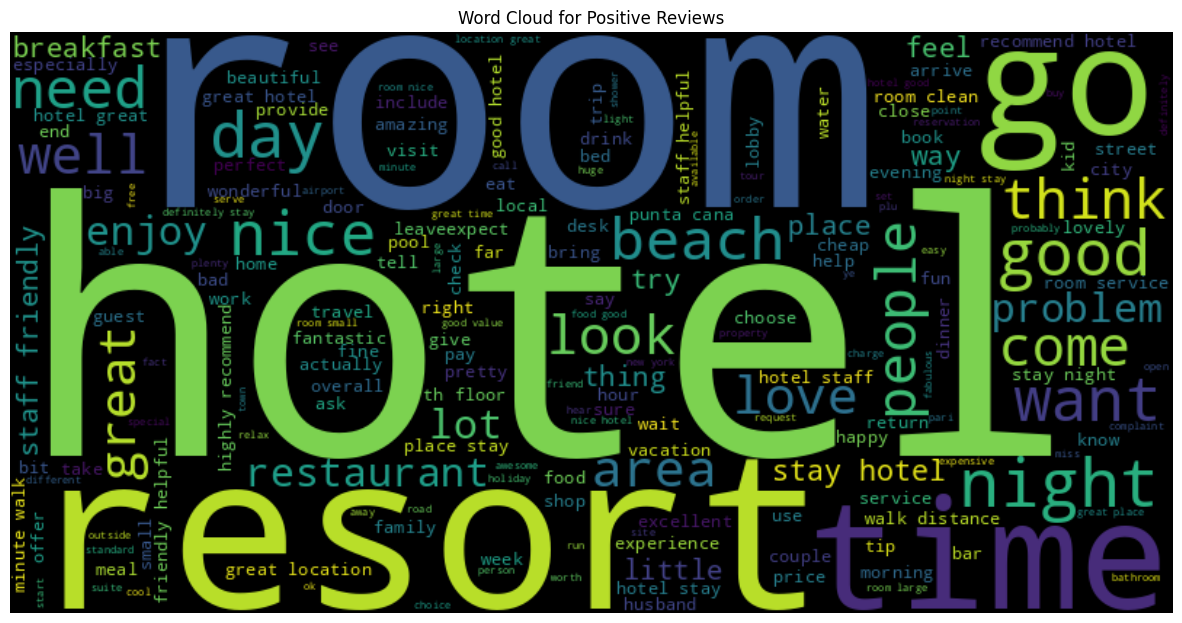

In [ ]:
# Combine the text data from the positive reviews
positive_review = ' '.join(review for review in positive_df['pr_text'].astype(str))

# Generate WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(positive_review)

# Display the WordCloud
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()

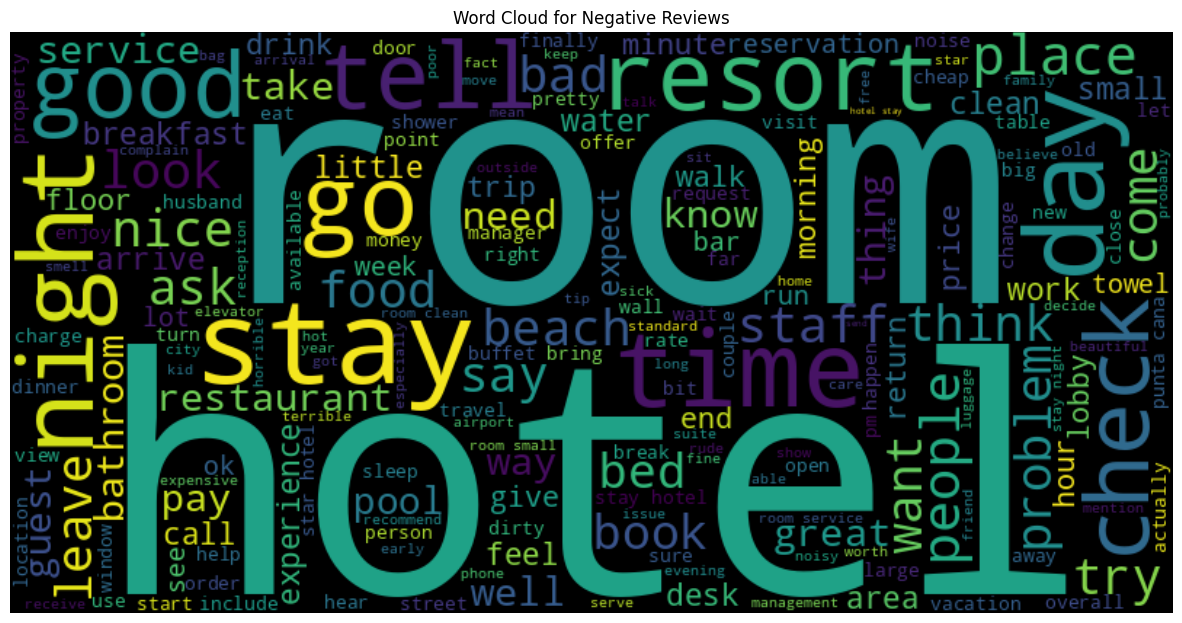

In [ ]:
negative_review = ' '.join(review for review in negative_df['pr_text'].astype(str))
# Generate WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(negative_review)
# Display the WordCloud
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews')
plt.show()

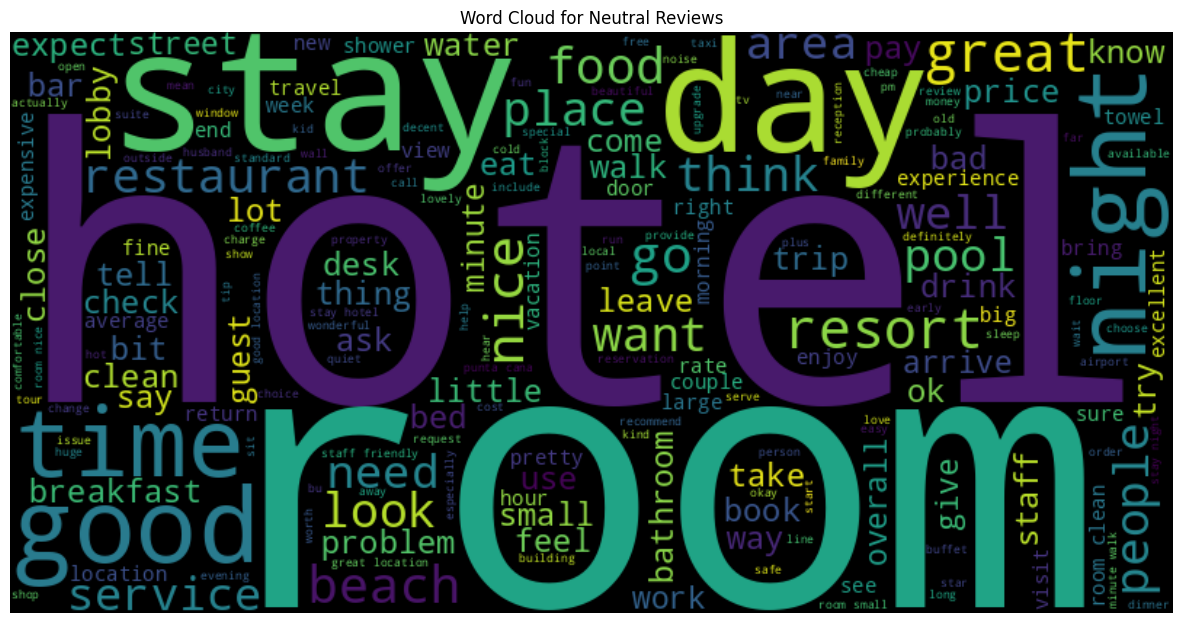

In [ ]:
neutral_review = ' '.join(review for review in neutral_df['pr_text'].astype(str))
# Generate WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(neutral_review)
# Display the WordCloud
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Neutral Reviews')
plt.show()

###Sentiment analysis

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
df_sia = data_pr.copy()
df_sia.head()

,Review,Rating,pr_text,Sentiment
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking get good deal sta...,Positive
1,ok nothing special charge diamond member hilto...,2,ok special charge diamond member hilton decide...,Negative
2,nice rooms not 4* experience hotel monaco seat...,3,nice room experience hotel monaco seattle good...,Neutral
3,"unique, great stay, wonderful time hotel monac...",5,unique great stay wonderful time hotel monaco ...,Positive
4,"great stay great stay, went seahawk game aweso...",5,great stay great stay go seahawk game awesome ...,Positive


In [ ]:
sid = SentimentIntensityAnalyzer()

In [ ]:
df_sia['scores'] = df_sia['pr_text'].apply(lambda pr_text: sid.polarity_scores(pr_text))
df_sia.head()

,Review,Rating,pr_text,Sentiment,scores
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking get good deal sta...,Positive,"{'neg': 0.055, 'neu': 0.624, 'pos': 0.321, 'co..."
1,ok nothing special charge diamond member hilto...,2,ok special charge diamond member hilton decide...,Negative,"{'neg': 0.051, 'neu': 0.683, 'pos': 0.266, 'co..."
2,nice rooms not 4* experience hotel monaco seat...,3,nice room experience hotel monaco seattle good...,Neutral,"{'neg': 0.056, 'neu': 0.687, 'pos': 0.258, 'co..."
3,"unique, great stay, wonderful time hotel monac...",5,unique great stay wonderful time hotel monaco ...,Positive,"{'neg': 0.0, 'neu': 0.549, 'pos': 0.451, 'comp..."
4,"great stay great stay, went seahawk game aweso...",5,great stay great stay go seahawk game awesome ...,Positive,"{'neg': 0.085, 'neu': 0.614, 'pos': 0.301, 'co..."


In [ ]:
df_sia['compound']  = df_sia['scores'].apply(lambda scores: scores['compound'])
df_sia.head()

,Review,Rating,pr_text,Sentiment,scores,compound
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking get good deal sta...,Positive,"{'neg': 0.055, 'neu': 0.624, 'pos': 0.321, 'co...",0.9808
1,ok nothing special charge diamond member hilto...,2,ok special charge diamond member hilton decide...,Negative,"{'neg': 0.051, 'neu': 0.683, 'pos': 0.266, 'co...",0.9955
2,nice rooms not 4* experience hotel monaco seat...,3,nice room experience hotel monaco seattle good...,Neutral,"{'neg': 0.056, 'neu': 0.687, 'pos': 0.258, 'co...",0.9938
3,"unique, great stay, wonderful time hotel monac...",5,unique great stay wonderful time hotel monaco ...,Positive,"{'neg': 0.0, 'neu': 0.549, 'pos': 0.451, 'comp...",0.9949
4,"great stay great stay, went seahawk game aweso...",5,great stay great stay go seahawk game awesome ...,Positive,"{'neg': 0.085, 'neu': 0.614, 'pos': 0.301, 'co...",0.9938


In [ ]:
df_sia['comp_score'] = df_sia['compound'].apply(lambda c: 'Positive' if c > 0 else('Negative' if c < 0 else 'Neutral'))
df_sia.head()

,Review,Rating,pr_text,Sentiment,scores,compound,comp_score
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking get good deal sta...,Positive,"{'neg': 0.055, 'neu': 0.624, 'pos': 0.321, 'co...",0.9808,Positive
1,ok nothing special charge diamond member hilto...,2,ok special charge diamond member hilton decide...,Negative,"{'neg': 0.051, 'neu': 0.683, 'pos': 0.266, 'co...",0.9955,Positive
2,nice rooms not 4* experience hotel monaco seat...,3,nice room experience hotel monaco seattle good...,Neutral,"{'neg': 0.056, 'neu': 0.687, 'pos': 0.258, 'co...",0.9938,Positive
3,"unique, great stay, wonderful time hotel monac...",5,unique great stay wonderful time hotel monaco ...,Positive,"{'neg': 0.0, 'neu': 0.549, 'pos': 0.451, 'comp...",0.9949,Positive
4,"great stay great stay, went seahawk game aweso...",5,great stay great stay go seahawk game awesome ...,Positive,"{'neg': 0.085, 'neu': 0.614, 'pos': 0.301, 'co...",0.9938,Positive


In [ ]:
df_sia['comp_score'].value_counts()

Positive    19451
Negative     1021
Neutral        19
Name: comp_score, dtype: int64

In [ ]:
accuracy_score(df_sia['Sentiment'],df_sia['comp_score'])

0.7788785320384559

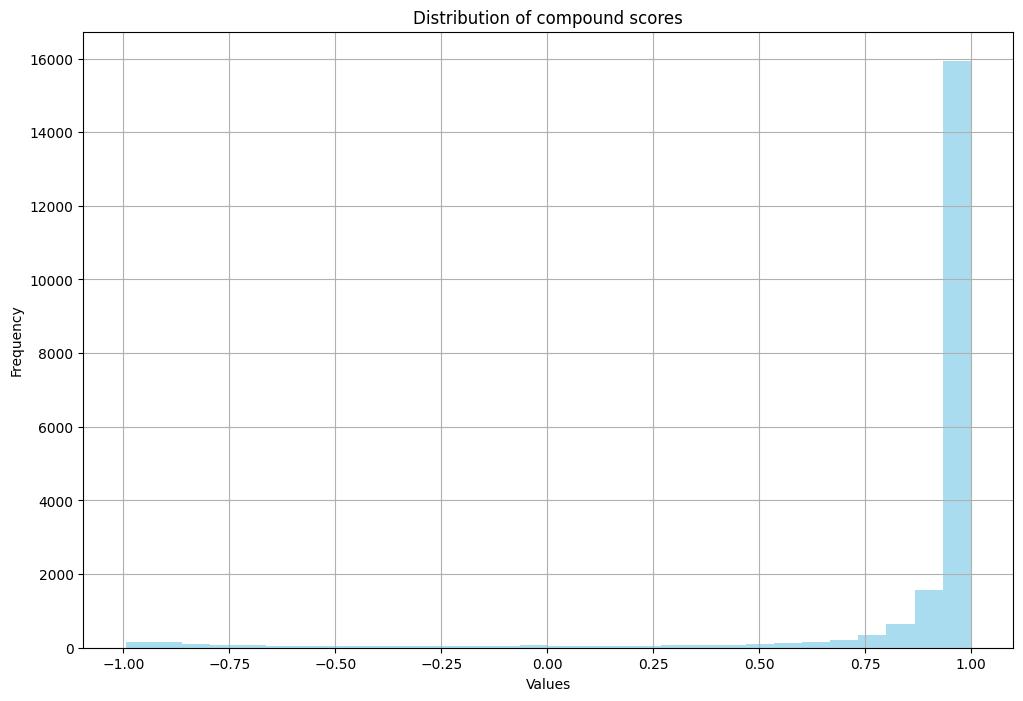

In [ ]:
plt.figure(figsize = (12,8))
plt.hist(df_sia['compound'], bins = 30, color = 'skyblue',alpha = 0.7)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution of compound scores')
plt.grid(True)

In [ ]:
data_pr.drop(['Review','Rating'], axis = 1, inplace = True)

In [ ]:
data_pr.head()

,pr_text,Sentiment
0,nice hotel expensive parking get good deal sta...,Positive
1,ok special charge diamond member hilton decide...,Negative
2,nice room experience hotel monaco seattle good...,Neutral
3,unique great stay wonderful time hotel monaco ...,Positive
4,great stay great stay go seahawk game awesome ...,Positive


### Balancing the imbalanced class

In [ ]:
from sklearn.utils import resample

In [ ]:
data_pr['Sentiment'].value_counts()

Positive    15093
Negative     3214
Neutral      2184
Name: Sentiment, dtype: int64

In [ ]:
# Separate the data into three DataFrames based on classes
positive_data = data_pr[data_pr['Sentiment'] == 'Positive']
negative_data = data_pr[data_pr['Sentiment'] == 'Negative']
neutral_data = data_pr[data_pr['Sentiment'] == 'Neutral']

In [ ]:
# Find the maximum number of instances in any class
max_instances = max(len(positive_data), len(negative_data), len(neutral_data))

In [ ]:
# Oversample the minority classes
oversampled_negative = resample(negative_data, replace=True, n_samples=max_instances, random_state=42)
oversampled_neutral = resample(neutral_data, replace=True, n_samples=max_instances, random_state=42)

In [ ]:
# Concatenate the oversampled DataFrames
oversampled_data = pd.concat([positive_data, oversampled_negative, oversampled_neutral])

In [ ]:
oversampled_data['Sentiment'].value_counts()

Positive    15093
Negative    15093
Neutral     15093
Name: Sentiment, dtype: int64

### X & Y

In [ ]:
x = oversampled_data['pr_text']
y = oversampled_data['Sentiment']

In [ ]:
x.head()

0    nice hotel expensive parking get good deal sta...
3    unique great stay wonderful time hotel monaco ...
4    great stay great stay go seahawk game awesome ...
5    love monaco staff husband stay hotel crazy wee...
6    cozy stay rainy city husband spend night monac...
Name: pr_text, dtype: object

In [ ]:
y.head()

0    Positive
3    Positive
4    Positive
5    Positive
6    Positive
Name: Sentiment, dtype: object

### Bag of words (Count Vectorizer)

The Bag of Words(Bow) Count vectorizer is used to convert text data into numerical vectors.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vect_1 = CountVectorizer(ngram_range = (1,1))
x_bow = vect_1.fit_transform(x,y)
pd.DataFrame(x_bow.toarray())

,0,1,2,3,4,5,6,7,8,9,...,43689,43690,43691,43692,43693,43694,43695,43696,43697,43698
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45274,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45275,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45276,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45277,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
vect_2 = CountVectorizer(ngram_range=(2,2))
x_bow2 = vect_2.fit_transform(x,y)
pd.DataFrame(x_bow2.toarray())

### TF-IDF Vector

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf_vect = TfidfVectorizer()
x_tfidf = tfidf_vect.fit_transform(x)
pd.DataFrame(x_tfidf.toarray())

,0,1,2,3,4,5,6,7,8,9,...,43689,43690,43691,43692,43693,43694,43695,43696,43697,43698
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45274,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45277,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Split the data into Train and Test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.33, random_state = 40)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((30336,), (14943,), (30336,), (14943,))

### Model Building

###SVM Pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

In [ ]:
text_ppl = Pipeline([('x_tfidf', TfidfVectorizer()),
                     ('clg',LinearSVC()),
                     ])

In [ ]:
text_ppl.fit(x_train,y_train)

Pipeline(steps=[('x_tfidf', TfidfVectorizer()), ('clg', LinearSVC())])

In [ ]:
predictions = text_ppl.predict(x_test)
predictions

array(['Neutral', 'Positive', 'Positive', ..., 'Negative', 'Negative',
       'Neutral'], dtype=object)

In [ ]:
y_test

2736      Neutral
19295    Positive
14026    Positive
6482      Neutral
5333      Neutral
           ...   
9918     Positive
1461      Neutral
13885    Negative
6394     Negative
18288     Neutral
Name: Sentiment, Length: 14943, dtype: object

In [ ]:
print(predictions.shape)

(14943,)


In [ ]:
# Print a classification report
print(metrics.confusion_matrix(y_test,predictions))

[[4814   54   41]
 [  16 4962   61]
 [ 128  399 4468]]


In [ ]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

    Negative       0.98      0.97      0.98      4958
     Neutral       0.98      0.92      0.95      5415
    Positive       0.89      0.98      0.93      4570

    accuracy                           0.95     14943
   macro avg       0.95      0.95      0.95     14943
weighted avg       0.96      0.95      0.95     14943



In [ ]:
accuracy_score(predictions,y_test)

0.953222244529211

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_ppl = Pipeline([('x_tfidf', TfidfVectorizer()),
                     ('clg',LogisticRegression()),
                     ])

In [ ]:
log_ppl.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Pipeline(steps=[('x_tfidf', TfidfVectorizer()), ('clg', LogisticRegression())])

In [ ]:
log_predictions = log_ppl.predict(x_test)
log_predictions

array(['Neutral', 'Positive', 'Positive', ..., 'Negative', 'Negative',
       'Neutral'], dtype=object)

In [ ]:
# Print a classification report
print(metrics.confusion_matrix(y_test,log_predictions))

[[4628  215   66]
 [ 175 4636  228]
 [ 114  525 4356]]


In [ ]:
print(classification_report(log_predictions,y_test))

              precision    recall  f1-score   support

    Negative       0.94      0.94      0.94      4917
     Neutral       0.92      0.86      0.89      5376
    Positive       0.87      0.94      0.90      4650

    accuracy                           0.91     14943
   macro avg       0.91      0.91      0.91     14943
weighted avg       0.91      0.91      0.91     14943



In [ ]:
accuracy_score(log_predictions,y_test)

0.9114635615338286

### Naive Bayes Model

In [ ]:
from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB

In [ ]:
# Multinomial Naive Bayes
classifier_mb = MB()

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x_tfidf,y, test_size = 0.33, random_state = 40)

In [ ]:
classifier_mb.fit(X_train, Y_train)

MultinomialNB()

In [ ]:
mb_pred = classifier_mb.predict(X_test)

In [ ]:
accuracy_score(mb_pred, Y_test)

0.8413303888108145

In [ ]:
text_ppl.predict(['The stay was good'])

array(['Positive'], dtype=object)

In [ ]:
text_ppl.predict(['The service was bad'])

array(['Negative'], dtype=object)

### Saving the trained model

In [ ]:
import pickle

In [ ]:
filename = 'trained_model.sav'
pickle.dump(text_ppl, open(filename, 'wb'))

In [ ]:
load_model = pickle.load(open('trained_model.sav','rb'))

https://ml-web-app-aprf3sqylwqnjqhbhhgufi.streamlit.app/


( This is the link to stremlit app. From this link you can understand the sentiment of the reviews )